In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

dataset = pd.read_csv('https://raw.githubusercontent.com/1rashikashrirame/Dataset/main/delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<Axes: >

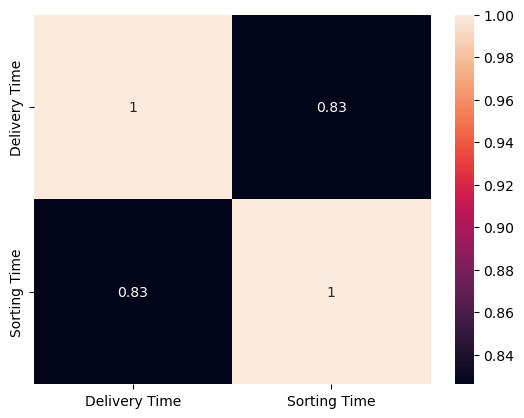

In [7]:
sns.heatmap(dataset.corr(),annot=True)

<Axes: xlabel='Delivery Time', ylabel='Density'>

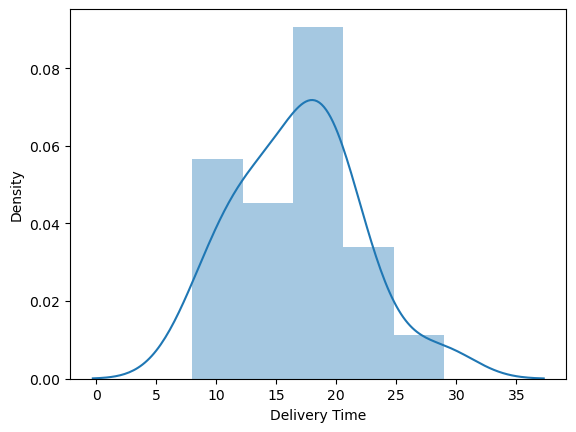

In [14]:
sns.distplot(dataset['Delivery Time'])

<Axes: xlabel='Sorting Time', ylabel='Density'>

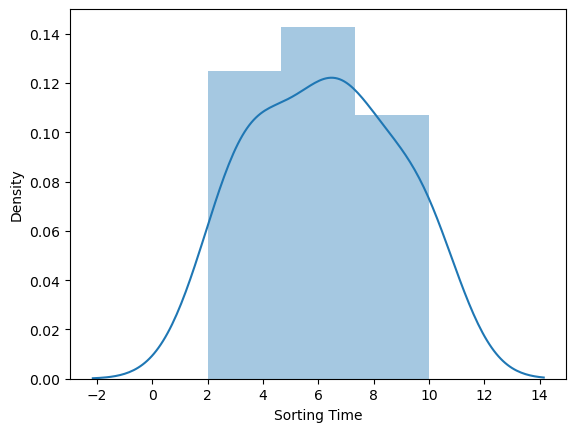

In [15]:
sns.distplot(dataset['Sorting Time'])

# Feature Engineering

In [17]:
# Renaming of Column

dataset = dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

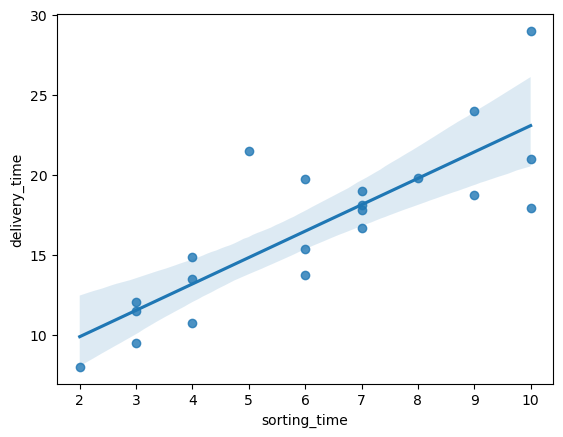

In [19]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

# Model Bulding

In [20]:
model = smf.ols("delivery_time~sorting_time",data=dataset).fit()

# Model Testing

In [22]:
# Finding Coefficient Parameter
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [23]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

# Model Predection

In [25]:
# Manual Prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [26]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [27]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [28]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64